In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./cnasim-data.csv',
skiprows=6, skipfooter=9, engine='python')
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


             Unadjusted  Seasonally adjusted
Adjustments                                 
1991-01-31     12588862             15026890
1991-02-28     12154321             15304585
1991-03-31     14337072             15413591
1991-04-30     15108570             15293409
1991-05-31     17225734             15676083


<AxesSubplot:xlabel='Adjustments'>

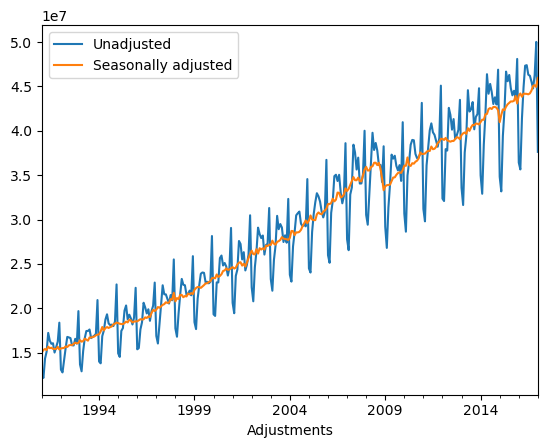

In [69]:
from pandas.tseries.offsets import MonthEnd
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
print(df.head())
df.plot()

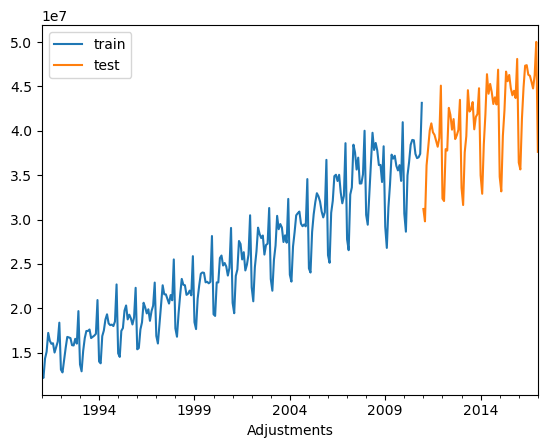

In [70]:
split_date = pd.Timestamp('01-01-2011')
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]
ax = train.plot() 
test.plot(ax=ax) 
plt.legend(['train', 'test'])

#### 데이터 정규화

In [71]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)
print(train_sc[:5])

[[0.01402033]
 [0.        ]
 [0.0704258 ]
 [0.09531795]
 [0.16362761]]


#### 데이터 합치기

In [72]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


#### Train Data 생성

In [73]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s) 
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)    

train_sc_df.head(13)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


#### 최종 데이터셋 구축

In [74]:
# N/A 포함 행 제거 
X_train = train_sc_df.dropna().drop('Scaled', axis=1) 
y_train = train_sc_df.dropna()[['Scaled']]
X_test = test_sc_df.dropna().drop('Scaled', axis=1) 
y_test = test_sc_df.dropna()[['Scaled']]
X_train.head()

# 데이터프레임 타입 -> ndarray 변환
X_train = X_train.values
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
print(y_train.shape)

# 최종 데이터셋
X_train_t = X_train.reshape(X_train.shape[0], 12, 1) 
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)
print(f'최종 데이터셋 Shape : {X_train_t.shape}')

(228, 12)
(228, 1)
최종 데이터셋 Shape : (228, 12, 1)


#### LSTM 모델 구축

In [75]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

# 파라미터 조정
epochs = 100
timestep = 12

K.clear_session()
model = Sequential() # Sequeatial Model
model.add(LSTM(timestep, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12)                672       
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 685
Trainable params: 685
Non-trainable params: 0
_________________________________________________________________


#### LSTM 모델 학습

In [79]:

model.fit(X_train_t, y_train, epochs=epochs, batch_size=30, verbose=1)

Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 12/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 13/100
8/8 [==============================] - 0s 3ms/st

#### 학습 결과

2/2 [==============================] - 0s 3ms/step


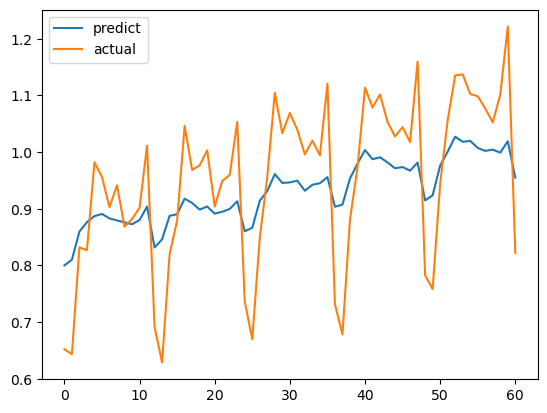

In [77]:
y_pred = model.predict(X_test_t)
plt.figure()
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['predict', 'actual'])

In [78]:
from sklearn.metrics import mean_squared_error
print(f'epochs = {epochs} , timestep = {timestep}')
print('Mean squared error: {0:.4f}'.format(mean_squared_error(y_test, y_pred)))

epochs = 100 , timestep = 12
Mean squared error: 0.0115
